# Beginner's Guide to the RISE (Randomized Image Sampling for Explanations)

##Download and import the libraries

In [ ]:
#install tensorflow (in case you don't have it)
!pip install tensorflow

In [ ]:
#import the libraries
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import resize
from tqdm import tqdm
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import cifar100

##Apply RISE

In [ ]:
#define the model you want to use RISE with (here, we use the model we trained in the ResNet50_on_CIFAR100_ModelTraining.ipynb file)
#load the resnet50_on_cifar100.keras file into this Colab and make sure it is fully loaded
class Model():
    def __init__(self):
        self.model = tf.keras.models.load_model('resnet50_on_cifar100.keras')
        self.input_size = (32, 32)

    def run_on_batch(self, x):
        return self.model.predict(x)

In [ ]:
#ensure that the images we will load have the same characteristics as the training ones
def load_img(path):
    img = image.load_img(path, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0
    return img, x

In [ ]:
#Generate random masks
def generate_masks(N, s, p1):
    cell_size = np.ceil(np.array([32, 32]) / s)
    up_size = (s + 1) * cell_size

    grid = np.random.rand(N, s, s) < p1
    grid = grid.astype('float32')

    masks = np.empty((N, 32, 32, 1))

    for i in tqdm(range(N), desc='Generating masks'):
        x = np.random.randint(0, cell_size[0])
        y = np.random.randint(0, cell_size[1])

        mask = resize(grid[i], up_size, order=1, mode='reflect', anti_aliasing=False)
        mask_cropped = mask[x:x + 32, y:y + 32]

        masks[i, :, :, 0] = mask_cropped

    return masks


In [ ]:
batch_size=100
def explain(model, inp, masks):
    preds = []
    masked = inp * masks
    for i in tqdm(range(0, N, batch_size), desc='Explaining'):
        preds.append(model.run_on_batch(masked[i:min(i+batch_size, N)]))
    preds = np.concatenate(preds)
    sal = preds.T.dot(masks.reshape(N, -1)).reshape(-1, *model.input_size)
    sal = sal / N / p1
    return sal

In [ ]:
(_, _), (_, _) = cifar100.load_data()
# CIFAR-100 class labels
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly',
                'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'cra', 'crocodile', 'cup',
               'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard',
               'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree',
               'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
               'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank',
               'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

def class_name(idx):
    return class_names[idx]

# check if it works
pred_idx = 42
print(class_name(pred_idx))

leopard


In [ ]:
model = Model()

In [ ]:
#load an image
img, x = load_img('cifar100_testimage.jpg')

In [ ]:
#set the number of the masks (N), the size (s) and the probability (p1)
N = 8000
s = 16
p1 = 0.5
masks = generate_masks(N, s, p1)

Generating masks: 100%|██████████| 8000/8000 [00:01<00:00, 6357.30it/s]


In [ ]:
sal = explain(model, x, masks)

Explaining:   0%|          | 0/80 [00:00<?, ?it/s]

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


Explaining:   1%|▏         | 1/80 [00:07<09:31,  7.23s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:   2%|▎         | 2/80 [00:07<04:05,  3.15s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:   4%|▍         | 3/80 [00:07<02:22,  1.84s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Explaining:   5%|▌         | 4/80 [00:08<01:33,  1.23s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Explaining:   6%|▋         | 5/80 [00:08<01:06,  1.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:   8%|▊         | 6/80 [00:08<00:50,  1.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:   9%|▉         | 7/80 [00:08<00:40,  1.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  10%|█         | 8/80 [00:09<00:33,  2.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Explaining:  11%|█▏        | 9/80 [00:09<00:29,  2.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Explaining:  12%|█▎        | 10/80 [00:09<00:26,  2.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  14%|█▍        | 11/80 [00:10<00:23,  2.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  15%|█▌        | 12/80 [00:10<00:22,  3.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  16%|█▋        | 13/80 [00:10<00:21,  3.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  18%|█▊        | 14/80 [00:10<00:20,  3.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  19%|█▉        | 15/80 [00:11<00:19,  3.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  20%|██        | 16/80 [00:11<00:19,  3.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Explaining:  21%|██▏       | 17/80 [00:11<00:18,  3.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  22%|██▎       | 18/80 [00:12<00:17,  3.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  24%|██▍       | 19/80 [00:12<00:17,  3.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  25%|██▌       | 20/80 [00:12<00:17,  3.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  26%|██▋       | 21/80 [00:12<00:17,  3.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  28%|██▊       | 22/80 [00:13<00:16,  3.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  29%|██▉       | 23/80 [00:13<00:16,  3.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Explaining:  30%|███       | 24/80 [00:13<00:16,  3.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Explaining:  31%|███▏      | 25/80 [00:14<00:15,  3.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  32%|███▎      | 26/80 [00:14<00:15,  3.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  34%|███▍      | 27/80 [00:14<00:15,  3.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  35%|███▌      | 28/80 [00:15<00:15,  3.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  36%|███▋      | 29/80 [00:15<00:14,  3.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  38%|███▊      | 30/80 [00:15<00:14,  3.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  39%|███▉      | 31/80 [00:15<00:14,  3.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  40%|████      | 32/80 [00:16<00:13,  3.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  41%|████▏     | 33/80 [00:16<00:13,  3.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  42%|████▎     | 34/80 [00:16<00:13,  3.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  44%|████▍     | 35/80 [00:17<00:13,  3.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  45%|████▌     | 36/80 [00:17<00:13,  3.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  46%|████▋     | 37/80 [00:17<00:12,  3.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  48%|████▊     | 38/80 [00:17<00:12,  3.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  49%|████▉     | 39/80 [00:18<00:12,  3.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  50%|█████     | 40/80 [00:18<00:11,  3.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  51%|█████▏    | 41/80 [00:18<00:11,  3.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  52%|█████▎    | 42/80 [00:19<00:11,  3.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  54%|█████▍    | 43/80 [00:19<00:10,  3.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  55%|█████▌    | 44/80 [00:19<00:10,  3.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  56%|█████▋    | 45/80 [00:20<00:10,  3.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  57%|█████▊    | 46/80 [00:20<00:09,  3.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  59%|█████▉    | 47/80 [00:20<00:09,  3.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  60%|██████    | 48/80 [00:20<00:09,  3.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  61%|██████▏   | 49/80 [00:21<00:09,  3.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  62%|██████▎   | 50/80 [00:21<00:08,  3.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Explaining:  64%|██████▍   | 51/80 [00:21<00:08,  3.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  65%|██████▌   | 52/80 [00:22<00:08,  3.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  66%|██████▋   | 53/80 [00:22<00:07,  3.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  68%|██████▊   | 54/80 [00:22<00:07,  3.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  69%|██████▉   | 55/80 [00:22<00:07,  3.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  70%|███████   | 56/80 [00:23<00:07,  3.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  71%|███████▏  | 57/80 [00:23<00:06,  3.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  72%|███████▎  | 58/80 [00:23<00:06,  3.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Explaining:  74%|███████▍  | 59/80 [00:24<00:06,  3.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Explaining:  75%|███████▌  | 60/80 [00:24<00:05,  3.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  76%|███████▋  | 61/80 [00:24<00:05,  3.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  78%|███████▊  | 62/80 [00:24<00:05,  3.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  79%|███████▉  | 63/80 [00:25<00:04,  3.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  80%|████████  | 64/80 [00:25<00:04,  3.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  81%|████████▏ | 65/80 [00:25<00:04,  3.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  82%|████████▎ | 66/80 [00:26<00:04,  3.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  84%|████████▍ | 67/80 [00:26<00:03,  3.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Explaining:  85%|████████▌ | 68/80 [00:26<00:03,  3.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  86%|████████▋ | 69/80 [00:27<00:03,  3.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Explaining:  88%|████████▊ | 70/80 [00:27<00:02,  3.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Explaining:  89%|████████▉ | 71/80 [00:27<00:02,  3.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  90%|█████████ | 72/80 [00:27<00:02,  3.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Explaining:  91%|█████████▏| 73/80 [00:28<00:02,  3.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Explaining:  92%|█████████▎| 74/80 [00:28<00:01,  3.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Explaining:  94%|█████████▍| 75/80 [00:28<00:01,  3.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  95%|█████████▌| 76/80 [00:29<00:01,  3.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Explaining:  96%|█████████▋| 77/80 [00:29<00:00,  3.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Explaining:  98%|█████████▊| 78/80 [00:29<00:00,  3.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining:  99%|█████████▉| 79/80 [00:30<00:00,  3.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Explaining: 100%|██████████| 80/80 [00:30<00:00,  2.64it/s]


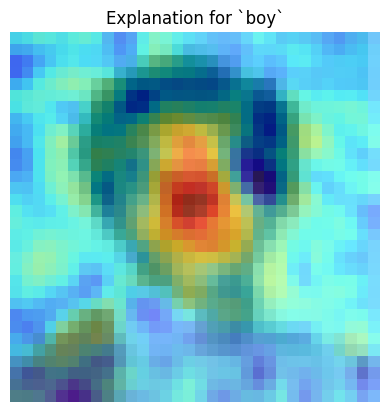

In [ ]:
class_idx = 11
plt.title('Explanation for `{}`'.format(class_name(class_idx)))
plt.axis('off')
plt.imshow(img)
plt.imshow(sal[class_idx], cmap='jet', alpha=0.5)
# plt.colorbar()
plt.show()